In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.decomposition import PCA
from imblearn.ensemble import BalanceCascade, EasyEnsemble
from sklearn.ensemble import AdaBoostClassifier
from tqdm import tqdm
import xgboost as xgb 
from imblearn.under_sampling import RepeatedEditedNearestNeighbours, TomekLinks
from collections import Counter
import pickle

# Data Reading

In [83]:
## Read dataset

df_x_train = pd.read_csv('dataset/train.csv', header= None)
df_y_train = pd.read_csv('dataset/train_labels.csv', header= None)
df_y_train.columns = ['label']
df_train = pd.concat((df_x_train,df_y_train), axis = 1) # concatenate X and Y

In [84]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,label
0,1280665.0,5735.0,121.0,1.0,0.0,978.0,5.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.99,0.00,0.0,0.00,0.00,0.0
1,336463.0,5977.0,67.0,1.0,0.0,978.0,5.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.00,78.00,0.0,78.00,78.00,0.0
2,899868.0,5651.0,67.0,1.0,0.0,978.0,5.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0
3,2177924.0,5691.0,16.0,0.0,0.0,978.0,0.0,2.0,1.0,0.0,...,89.6,89.6,0.0,0.0,0.00,259.74,89.6,259.74,259.74,0.0
4,1280665.0,5735.0,121.0,1.0,0.0,978.0,5.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0


In [85]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,label
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.153017e+06,5789.592100,66.060790,0.527930,0.064770,950.622050,2.91140,2.935490,0.435090,0.585130,...,53.999384,48.141110,28.247964,41.570204,82.746682,80.435257,51.255593,67.784037,80.320324,0.002130
std,7.408450e+05,998.402186,56.379468,0.499222,0.246121,113.129153,2.58682,0.943153,0.495771,0.492702,...,1218.064010,1210.159503,1138.933516,1192.381318,1343.725633,1226.869895,1211.007185,1216.991705,1231.975149,0.046103
min,6.200000e+01,742.000000,0.000000,0.000000,0.000000,-1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.790780e+05,5411.000000,16.000000,0.000000,0.000000,978.000000,0.00000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.060490e+06,5735.000000,67.000000,1.000000,0.000000,978.000000,5.00000,3.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.003550e+06,5968.000000,95.000000,1.000000,0.000000,978.000000,5.00000,4.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,21.300000,0.000000,7.000000,18.200000,0.000000
max,2.386839e+06,9999.000000,224.000000,1.000000,1.000000,986.000000,9.00000,5.000000,1.000000,1.000000,...,203038.000000,203038.000000,203038.000000,203038.000000,203038.000000,203038.000000,203038.000000,203038.000000,203038.000000,1.000000


# Data Exploration and Treatement 

In [86]:
## first 21 elements are categories and remaining floats
for i in range(21):
    df_train[i] = df_train[i].astype('category')


In [87]:
"""
Everything seems just fine, except for column 0 
"""
## Check for NaNs
temp_ls = df_train.isnull().any().tolist()
print("Number of Nan values = {}".format(sum(temp_ls)))

## Check for zero variance 
zero_var = 0
for i in range(53):
    if len(df_train[i].value_counts()) == 1:
        zero_var += 1
print("Number of attributes with zero variance = {}".format(zero_var))

## Check of high variation 
high_var = 0
temp_ls = list()
for i in range(21): # only first 21 elements are categorical
    if len(df_train[i].value_counts()) >= df_train.shape[0]/3:
        temp_ls.append(i)
        high_var += 1
print("Number of attributes with high variance = {}".format(high_var))

df_train.drop(temp_ls, axis = 1, inplace = True)# drop columns in temp_ls

Number of Nan values = 0
Number of attributes with zero variance = 0
Number of attributes with high variance = 1


In [88]:
df_train.dtypes

1        category
2        category
3        category
4        category
5        category
6        category
7        category
8        category
9        category
10       category
11       category
12       category
13       category
14       category
15       category
16       category
17       category
18       category
19       category
20       category
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
label     float64
dtype: object

In [89]:
## 0.2% are fraudulent data
df_train['label'].value_counts()

0.0    99787
1.0      213
Name: label, dtype: int64

In [90]:
## Normalizing 
x = df_train.values[:,20:-1] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

## Delete existing numerical columns and replacing with normalised version
col_name = [i for i in range(21, 53)]
df_temp = pd.DataFrame(x_scaled, columns= col_name)
df_train.drop(col_name, axis = 1, inplace = True)
df_train = df_train.merge(df_temp,left_index=True, right_index=True)

## Adding label to end of dataframe
temp_ls = df_train['label'].tolist()
df_train.drop('label', axis = 1, inplace = True)
df_train['label'] = temp_ls
df_train['label'] = df_train['label'].astype('category')

/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


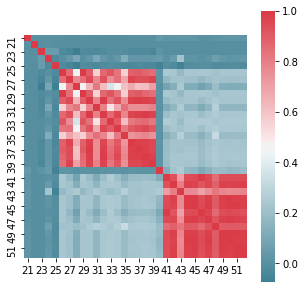

In [91]:
## Finding correlated features
f, ax = plt.subplots(figsize=(5, 5))
corr = df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,)
plt.show()

In [92]:
## Delete highly correlated terms (corr > 0.98)
temp_ls = list()
for i in corr.columns:
    for j in range(i,len(corr.columns)+21):
        if corr[i][j] > 0.98 and i != j: temp_ls.append((i,j))

temp_ls = [j for(i,j) in temp_ls]
df_train.drop(set(temp_ls), axis = 1, inplace = True)

In [12]:
## Get list of binary attributes 
temp_ls = list()
for i in range(1,21):
    temp = len(df_train[i].value_counts())
    if temp <= 2: temp_ls.append(i)
temp_ls.append('label')

## Converting df to one-hot representation
cols_oh = [i  for i in range(1,21) if i not in temp_ls]
df_train_oh = pd.get_dummies(df_train, columns = cols_oh, sparse = True)

# Machine Learning Models

In [13]:
X = df_train.drop('label', axis = 1)
X = X.as_matrix()
Y = df_train['label'].as_matrix()
Y = Y.astype('int')

## Train - Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


## Basic Models - Weighted

Here I would test some SOTA machine learning models like, logistic regression, SVMs, decision trees, Random forest, Adaboost etc

### Logistic Regression - Non-weighted

In [249]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [250]:
print(classification_report(Y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     19955
        1.0       0.67      0.04      0.08        45

avg / total       1.00      1.00      1.00     20000



### Logistic Regression - Weighted

In [238]:
clf = LogisticRegression(class_weight= 'balanced')
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [240]:
print(classification_report(Y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

        0.0       1.00      0.97      0.98     19955
        1.0       0.02      0.29      0.04        45

avg / total       1.00      0.97      0.98     20000



In [241]:
print(confusion_matrix(Y_test, clf.predict(X_test)))

[[19339   616]
 [   32    13]]


### Decision Trees - Weighted

In [313]:
clf = DecisionTreeClassifier(class_weight = 'balanced')
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [314]:
print(classification_report(Y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     19955
        1.0       0.12      0.22      0.15        45

avg / total       1.00      0.99      1.00     20000



In [315]:
print(confusion_matrix(Y_test, clf.predict(X_test)))

[[19880    75]
 [   35    10]]


### Random Forest - Weighted

In [245]:
clf_base = RandomForestClassifier()
grid  = {'n_estimators' :[100],
         'max_features' : ['auto'],
         'criterion' : ['entropy']}
clf = GridSearchCV(clf_base, grid)
clf.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'max_features': ['auto'], 'criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [247]:
print(classification_report(Y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     19955
        1.0       1.00      0.09      0.16        45

avg / total       1.00      1.00      1.00     20000



In [248]:
print(confusion_matrix(Y_test, clf.predict(X_test)))

[[19955     0]
 [   41     4]]


## Ensemble Methods

### Easy Ensemble - Logistic Regresssion

In [51]:
ens = EasyEnsemble(n_subsets= 25)
X_train_ee, Y_train_ee = ens.fit_sample(X_train, Y_train)

In [31]:
y_pred_probs_lr = np.zeros((20000,2))
for idx in range(len(Y_train_ee)): 
    clf_lr = LogisticRegression()
    grid  = {'C' : 10.0 ** np.arange(-2,3),
             'penalty' : ['l2','l1']}
    cv = KFold(n_splits = 3, shuffle = True, random_state=0)
    clf_lr_boost = GridSearchCV(clf_lr, grid, cv = cv)
    clf_lr_boost.fit(X_train_ee[idx], Y_train_ee[idx])
    y_pred_probs_lr += clf_lr_boost.predict_proba(X_test)

In [32]:
print(classification_report(Y_test, np.argmax(y_pred_probs_lr, axis = 1)))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90     19955
          1       0.01      0.89      0.02        45

avg / total       1.00      0.82      0.90     20000



In [33]:
print(confusion_matrix(Y_test, np.argmax(y_pred_probs_lr, axis = 1)))

[[16308  3647]
 [    5    40]]


### Easy Ensemble - RandomForest

In [34]:
y_pred_probs_rf = np.zeros((20000,2))
for idx in range(len(Y_train_ee)): 
    clf_base = RandomForestClassifier()
    grid  = {'n_estimators' :[100],
             'max_features' : ['auto'],
             'criterion' : ['entropy']}
    #cv = KFold(n_splits = 5, shuffle = True, random_state = 0)
    clf_rf_boost = GridSearchCV(clf_base, grid)
    clf_rf_boost.fit(X_train_ee[idx], Y_train_ee[idx])
    y_pred_probs_rf += clf_rf_boost.predict_proba(X_test)

In [35]:
print(classification_report(Y_test, np.argmax(y_pred_probs_rf, axis = 1)))

             precision    recall  f1-score   support

          0       1.00      0.85      0.92     19955
          1       0.01      0.91      0.03        45

avg / total       1.00      0.85      0.92     20000



In [36]:
print(confusion_matrix(Y_test, np.argmax(y_pred_probs_rf, axis = 1)))

[[17039  2916]
 [    4    41]]


### Easy Ensemble - ADAboost

In [48]:
y_pred_probs_ada = np.zeros((20000,2))
for idx in range(len(Y_train_ee)): 
    clf_ada = AdaBoostClassifier()
    clf_ada.fit(X_train_ee[idx], Y_train_ee[idx])
    y_pred_probs_ada += clf_ada.predict_proba(X_test)

In [49]:
print(classification_report(Y_test, np.argmax(y_pred_probs_ada, axis = 1)))

             precision    recall  f1-score   support

          0       1.00      0.85      0.92     19955
          1       0.01      0.93      0.03        45

avg / total       1.00      0.85      0.92     20000



In [50]:
print(confusion_matrix(Y_test, np.argmax(y_pred_probs_ada, axis = 1)))

[[17049  2906]
 [    3    42]]


### Easy Ensemble - XGBOOST

In [52]:
y_pred_probs_xg = np.zeros((20000,2))
for idx in range(len(Y_train_ee)): 
    clf_xgb = xgb.XGBClassifier()

    clf_xgb.fit(X_train_ee[idx], Y_train_ee[idx])
    y_pred_probs_xg += clf_xgb.predict_proba(X_test)

In [53]:
print(classification_report(Y_test, np.argmax(y_pred_probs_xg, axis = 1)))

             precision    recall  f1-score   support

          0       1.00      0.86      0.93     19955
          1       0.01      0.93      0.03        45

avg / total       1.00      0.86      0.92     20000



In [54]:
print(confusion_matrix(Y_test, np.argmax(y_pred_probs_xg, axis = 1)))

[[17182  2773]
 [    3    42]]


### Balance Cascade - Logistic Regression

In [15]:
ens = BalanceCascade(classifier = 'adaboost', random_state = 1)
X_train_res, Y_train_res = ens.fit_sample(X_train, Y_train)

In [76]:
y_pred_probs_lr = np.zeros((20000,2))
for idx in range(len(Y_train_res)): 
    clf_lr = LogisticRegression()
    grid  = {'C' : 10.0 ** np.arange(-2,3),
             'penalty' : ['l2','l1']}
    cv = KFold(n_splits = 3, shuffle = True, random_state=0)
    clf_lr_boost = GridSearchCV(clf_lr, grid, cv = cv)
    clf_lr_boost.fit(X_train_res[idx], Y_train_res[idx])
    y_pred_probs_lr += clf_lr_boost.predict_proba(X_test)

In [77]:
print(classification_report(Y_test, np.argmax(y_pred_probs_lr, axis = 1)))

             precision    recall  f1-score   support

          0       1.00      0.84      0.91     19955
          1       0.01      0.84      0.02        45

avg / total       1.00      0.84      0.91     20000



In [78]:
print(confusion_matrix(Y_test, np.argmax(y_pred_probs_lr, axis = 1)))

[[16767  3188]
 [    7    38]]


### Balance Cascade - Random Forest

In [71]:
y_pred_probs_rf = np.zeros((20000,2))
for idx in tqdm(range(len(Y_train_res))):  
    clf_base = RandomForestClassifier()
    grid  = {'n_estimators' :[100],
             'max_features' : ['auto'],
             'criterion' : ['entropy']}
   
    clf_rf_boost = GridSearchCV(clf_base, grid)
    clf_rf_boost.fit(X_train_res[idx], Y_train_res[idx])
    y_pred_probs_rf += clf_rf_boost.predict_proba(X_test)

  2%|▏         | 10/631 [00:09<09:30,  1.09it/s]/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
  3%|▎         | 21/631 [00:19<09:15,  1.10it/s]/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
  5%|▌         | 32/631 [00:29<09:09,  1.09it/s]/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
  7%|▋         | 43/631 [00:39<08:58,  1.09it/s]/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.

In [72]:
print(classification_report(Y_test, np.argmax(y_pred_probs_rf, axis = 1)))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94     19955
          1       0.02      0.89      0.03        45

avg / total       1.00      0.89      0.94     20000



In [75]:
print(confusion_matrix(Y_test, np.argmax(y_pred_probs_rf, axis = 1)))

[[17673  2282]
 [    5    40]]


### Balance Cascade - AdaBoost

In [68]:
y_pred_probs_ada = np.zeros((20000,2))
for idx in range(len(Y_train_res)): 
    clf_ada = AdaBoostClassifier()
    clf_ada.fit(X_train_res[idx], Y_train_res[idx])
    y_pred_probs_ada += clf_ada.predict_proba(X_test)

In [69]:
print(classification_report(Y_test, np.argmax(y_pred_probs_ada, axis = 1)))

             precision    recall  f1-score   support

          0       1.00      0.88      0.94     19955
          1       0.02      0.91      0.03        45

avg / total       1.00      0.88      0.94     20000



In [74]:
print(confusion_matrix(Y_test, np.argmax(y_pred_probs_ada, axis = 1)))

[[17621  2334]
 [    4    41]]


### Balance Cascade - Xgboost

In [65]:
y_pred_probs_xg = np.zeros((20000,2))
for idx in range(len(Y_train_res)): 
    clf_xgb = xgb.XGBClassifier()

    clf_xgb.fit(X_train_res[idx], Y_train_res[idx])
    y_pred_probs_xg += clf_xgb.predict_proba(X_test)

In [136]:
print(classification_report(Y_test, np.argmax(y_pred_probs_xg, axis = 1)))

             precision    recall  f1-score   support

          0       1.00      0.90      0.95     19955
          1       0.02      0.93      0.04        45

avg / total       1.00      0.90      0.94     20000



In [137]:
print(confusion_matrix(Y_test, np.argmax(y_pred_probs_xg, axis = 1)))

[[17890  2065]
 [    3    42]]


In [135]:
filename = "xgboost_best.sav"
pickle.dump(clf_xgb, open(filename, 'wb'))

# Running Predictions on True Test set

In [141]:
df_test = pd.read_csv('dataset/test.csv', header= None)

In [142]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1873425.0,6011.0,16.0,0.0,0.0,978.0,0.0,2.0,1.0,0.0,...,240.92,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,871370.0,5816.0,121.0,1.0,0.0,978.0,5.0,3.0,0.0,1.0,...,299.67,68.39,68.39,0.0,68.39,294.68,68.39,68.39,68.39,68.39
2,963526.0,7512.0,152.0,0.0,0.0,578.0,0.0,2.0,1.0,1.0,...,1458.82,99.55,0.00,0.0,0.00,0.00,99.55,99.55,0.00,140.40
3,2063158.0,4899.0,151.0,1.0,0.0,978.0,6.0,3.0,0.0,1.0,...,449.29,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,321137.0,7011.0,211.0,1.0,0.0,840.0,6.0,4.0,0.0,1.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [102]:
## Drop columns as in previous case

# Drop high variance column
df_test.drop(0, axis = 1, inplace = True)

# Drop highly correlated column 
df_test.drop(set(temp_ls), axis = 1, inplace = True)

In [108]:
## prepare data for testing
X_true_test = df_test.as_matrix()

/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [130]:
## Get class and probability of class prediction
Y_true_pred = np.zeros((100000,2))
for idx in range(len(Y_train_res)): 
    clf_xgb = xgb.XGBClassifier()
    clf_xgb.fit(X_train_res[idx], Y_train_res[idx])
    Y_true_pred += clf_xgb.predict_proba(X_true_test)

classes = np.argmax(Y_true_pred, axis = 1)
probs = Y_true_pred.tolist()
probs = [[round(probs[i][0]/631,3),round(probs[i][1]/631,3)] for i in range(len(probs))]

In [169]:
## Write results into text file
dataFile = open('prediction_test.txt', 'w')
dataFile.write('Class'+'\t' + 'Prob_0' + '\t' + 'Prob_1' + '\n')
for i in range(len(probs)):
    dataFile.write(str(classes[i])+'\t' +str(probs[i][0])+'\t' +str(probs[i][1])+'\n')

dataFile.close()

In [172]:
Counter(classes)

Counter({0: 52786, 1: 47214})

## Sampling Methods (discontinued as better results in terms of recall are bound to be achieved with hybrid boosting methods)

### Undersampling methods

In [64]:
######### TOMEK LINK REMOVAL #########
"""
Not too useful give that it removed a very few examples only
"""
us = TomekLinks(random_state= 1) 
X_train_tm, Y_train_tm = us.fit_sample(X_train, Y_train)
print("number of class labels before resampling {}".format(Counter(Y_train)))
print("number of class labels after simple random resampling {}".format(Counter(Y_train_tm)))

number of class labels before resampling Counter({0: 79832, 1: 168})
number of class labels after simple random resampling Counter({0: 79763, 1: 168})


In [ ]:
## LOGISTIC
clf_lr = LogisticRegression()
grid = {'C': 10.0 ** np.arange(-2,3),# this is hyperparameter, C=1/lambda, where lambda is the regularisation term
        'penalty': ['l1','l2']} # this would be the regularisation parameters
    
cv = KFold(n_splits = 5, shuffle= True, random_state = 0)
clf = GridSearchCV(clf_lr, grid, cv=cv)
clf.fit(X_train_tm,Y_train_tm)

print(classification_report(Y_test, clf.predict(X_test)))
print(confusion_matrix(Y_test, clf.predict(X_test)))

In [ ]:
## SVM
clf_base = SVC()
grid = {'kernel' : ['rbf', 'poly'],
        'C' : [0.1, 1, 10],
        'gamma' : [0.01, 0.1, 1],
        'degree' : [1,3,6]}

cv = KFold(n_splits = 3, shuffle = True, random_state = 0)
clf = GridSearchCV(clf_base, grid)
clf.fit(X_train_tm,y_train_tm)

print(classification_report(Y_test, clf.predict(X_test)))
print(confusion_matrix(Y_test, clf.predict(X_test)))

In [ ]:
## RANDOM FOREST
clf_base = RandomForestClassifier()
grid  = {'n_estimators' :[500],
         'max_features' : ['auto'],
         'criterion' : ['entropy']}

clf = GridSearchCV(clf_base, grid)
clf.fit(X_train_tm,y_train_tm)

print(classification_report(Y_test, clf.predict(X_test)))
print(confusion_matrix(Y_test, clf.predict(X_test)))

In [ ]:
## ADABOOST
clf = AdaBoostClassifier()
clf.fit(X_train_tm,y_train_tm)

print(classification_report(Y_test, clf.predict(X_test)))
print(confusion_matrix(Y_test, clf.predict(X_test)))

### Oversampling methods

### Hybrid Methods